# Optimized Recruitment: Big Data Talent Analytics from Indeed Listings

Import necessary libraries

In [2]:
!pip install pandasql
import pandasql as ps
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from bs4 import BeautifulSoup
import unicodedata
import re
import math
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from time import process_time

Dataset Loading

In [44]:
Indeed_Jobs_Data_DB_ = pd.read_csv('/Users/vineelakolagani//Documents/PDS_PROJECT_FINAL/DATASET/jobs_indeed.csv')
Indeed_Jobs_Data_DB_

,Unnamed: 0,Title,Company,Location,Rating,Date,Salary,Description,Links,Descriptions
0,0,Data Scientist,Driven Brands,"Benicia, CA",2.4,PostedPosted 26 days ago,NaN,You’ll be working alongside a team of eight an...,https://www.indeed.com/rc/clk?jk=74d176d595225...,We invite you to join us at Driven Brands!\nHe...
1,1,Business Analyst,Sabot Consulting,Remote,NaN,PostedPosted 4 days ago,$80 - $120 an hour,Preferred candidates will have prior experienc...,https://www.indeed.com/rc/clk?jk=f662b2efb509b...,Sabot Consulting (Sabot) is a management consu...
2,2,IT Business Intelligence Developer (FT) Remote...,Ballad Health,"Remote in Blountville, TN",3.0,PostedPosted 30+ days ago,NaN,Job Details Apply Save Print this job Email a…,https://www.indeed.com/rc/clk?jk=58612836c63b8...,Job Details\nApply\nSave\nPrint this job\nEmai...
3,3,Data Engineer,Longevity Holdings Inc.,"Remote in Minneapolis-Saint Paul, MN",NaN,PostedPosted 3 days ago,"$90,000 - $110,000 a year",Incorporate core data management competencies ...,https://www.indeed.com/company/TwentyFirst/job...,Position: Data Engineer\nLocation: MN\nAs a Da...
4,4,Network Administrator/dba developer,WKI Kenworth,"Wichita, KS 67219",NaN,EmployerActive 2 days ago,"$50,000 - $70,000 a year",The Network Administrator provides 2nd level e...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Full Job Description\nThe Network Administrato...
...,...,...,...,...,...,...,...,...,...,...
1195,1195,Senior Machine Learning Engineer,HyperScience,Remote,NaN,PostedPosted 24 days ago,"$191,000 - $235,000 a year",We turn ML lab experiments into enterprise-rea...,https://www.indeed.com/rc/clk?jk=e4a29b9e718fa...,Company Description\nHyperscience is transform...
1196,1196,Data Scientist,N9 it solutions,Remote,NaN,PostedPosted 4 days ago,$40 - $60 an hour,Experience using a variety of data mining/data...,https://www.indeed.com/company/N9-IT-SOLUTIONS...,Job Title: - Data Scientist\nPosition: - W2 Em...
1197,1197,Data Engineer,Marathon TS,+1 locationRemote,NaN,PostedPosted 2 days ago,"$126,722 - $137,383 a year","3 years working with databases, data modeling,...",https://www.indeed.com/company/Marathon-TS/job...,Data Engineer/Power BI\nLocation: Remote (Base...
1198,1198,"Director of Data Science and Engineering, RV T...",Red Ventures,"Remote in New York, NY 10011",3.2,PostedPosted 30+ days ago,"$145,000 - $260,000 a year",You will be responsible for overseeing the tea...,https://www.indeed.com/rc/clk?jk=3d81eedd0854c...,"In this role, you will have the opportunity to..."


Dataset Cleaning,Text, and  Manipulation

In [4]:

def Method_HtmlParser(setText):
  Getsoup = BeautifulSoup(setText,'html.parser')
  return Getsoup.get_text()
def Method_CharacterNormalization(setText):
  setText = unicodedata.normalize('NFKD', setText).encode('ascii', 'ignore').decode('utf-8')
  return setText
def Method_URL_Cleaning(setText):
    setText = re.sub(r'http\S+', '', setText)
    setText = re.sub(r'www\S+', '', setText)
    return(setText)
def Method_Spaces_Cleaning(setText):
    setText = re.sub(r'\s+',' ',setText)
    setText = re.sub(r'-','',setText)
    return setText
def Method_Cleaning_Special_Chars(setText):
    setText = re.sub(r'[^a-zA-Z ]+', ' ', setText)
    return setText

def Method_Cleaning_Text(setText):
    Method_HtmlParser(setText)
    Method_CharacterNormalization(setText)
    Method_URL_Cleaning(setText)
    Method_Spaces_Cleaning(setText)
    Method_Cleaning_Special_Chars(setText)
def Method_For_Cleaning_JobTitles(JobTitle):
    if 'data e' in JobTitle:
        return 'data engineer'
    elif 'data s' in JobTitle:
        return 'data science'
    elif 'data a' in JobTitle:
        return 'data analyst'
    elif 'database' in JobTitle:
        return 'database'
    elif 'data' in JobTitle:
        return 'other data jobs'
    elif 'business' in JobTitle:
        return 'business'
    elif 'machine' in JobTitle:
        return 'machine learning'
    elif 'software' in JobTitle:
        return 'software engineer'
    elif 'developer' in JobTitle:
        return 'developer'
    else:
        return 'other categories'
def Method_For_Cleaning_Locations(JobTitle):
    if ', CA' in JobTitle:
        return 'CA'
    elif ', NY' in JobTitle:
        return 'NY'
    elif ', TX' in JobTitle:
        return 'TX'
    elif ', WI' in JobTitle:
        return 'WI'
    elif ', WA' in JobTitle:
        return 'WA'
    elif ', MA' in JobTitle:
        return 'MA'
    elif ', MN' in JobTitle:
        return 'MN'
    elif ', TN' in JobTitle:
        return 'TN'
    elif ', IL' in JobTitle:
        return 'IL'
    elif ', CT' in JobTitle:
        return 'CT'
    elif ', MD' in JobTitle:
        return 'MD'
    elif ', CO' in JobTitle:
        return 'CO'
    elif ', NJ' in JobTitle:
        return 'NJ'
    elif ', NC' in JobTitle:
        return 'NC'
    elif ', GA' in JobTitle:
        return 'GA'
    elif ', DC' in JobTitle:
        return 'DC'
    elif ', OH' in JobTitle:
        return 'OH'
    elif ', OR' in JobTitle:
        return 'OR'
    elif ', VA' in JobTitle:
        return 'VA'
    elif ', PA' in JobTitle:
        return 'PA'
    elif ', FL' in JobTitle:
        return 'FL'
    elif ', MI' in JobTitle:
        return 'MI'
    elif ', MO' in JobTitle:
        return 'MO'
    elif ', NE' in JobTitle:
        return 'NE'
    elif 'remote' in JobTitle.lower():
        return 'remote'
    else:
        return 'other loc'

Dataset Analysis

In [5]:
Indeed_Jobs_Data_DB_.info()
Indeed_Jobs_Data_DB_.head()
Indeed_Jobs_Data_DB_.isnull().sum()
Indeed_Jobs_Data_DB_.drop(['Unnamed: 0'], axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1200 non-null   int64  
 1   Title         1200 non-null   object 
 2   Company       1200 non-null   object 
 3   Location      1200 non-null   object 
 4   Rating        745 non-null    float64
 5   Date          1200 non-null   object 
 6   Salary        582 non-null    object 
 7   Description   1200 non-null   object 
 8   Links         1200 non-null   object 
 9   Descriptions  1200 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 93.9+ KB


In [6]:
len(Indeed_Jobs_Data_DB_.Title.unique())
Indeed_Jobs_Data_DB_['Title_lower'] = Indeed_Jobs_Data_DB_.Title.apply(lambda x: x.lower())
Indeed_Jobs_Data_DB_.Title.apply(lambda x: x.lower()).str.contains('datab').sum()

144

In [7]:
Indeed_Jobs_Data_DB_['Title_job'] = Indeed_Jobs_Data_DB_.Title_lower.apply(Method_For_Cleaning_JobTitles)
Indeed_Jobs_Data_DB_.Title.groupby(Indeed_Jobs_Data_DB_.Title_job).count()
Indeed_Jobs_Data_DB_1 = Indeed_Jobs_Data_DB_.drop(['Title','Title_lower'], axis=1)
JobTitle_index = Indeed_Jobs_Data_DB_1.groupby('Title_job')['Title_job'].count().index
JobTitle_Values = Indeed_Jobs_Data_DB_1.groupby('Title_job')['Title_job'].count().values

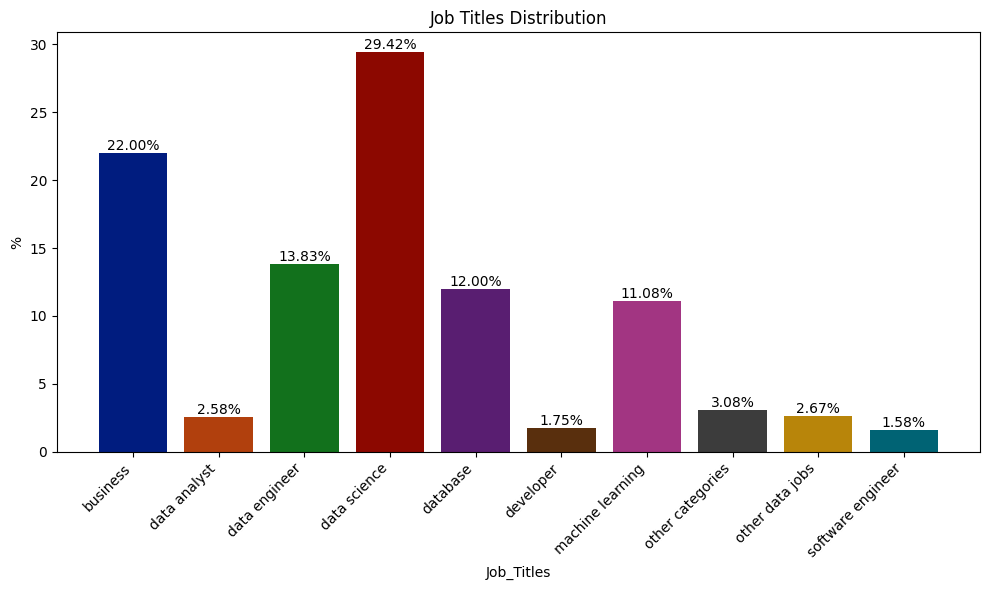

In [8]:
setColors_ = sns.color_palette('dark')
settotal = sum(JobTitle_Values)
setpercentages = [(value / settotal) * 100 for value in JobTitle_Values]
plt.figure(figsize=(10, 6))
setbars = plt.bar(JobTitle_index, setpercentages, color=setColors_)
for b in setbars:
    yval = b.get_height()
    plt.text(b.get_x() + b.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')
plt.title('Job Titles Distribution')
plt.xlabel('Job_Titles')
plt.ylabel('%')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Company feature

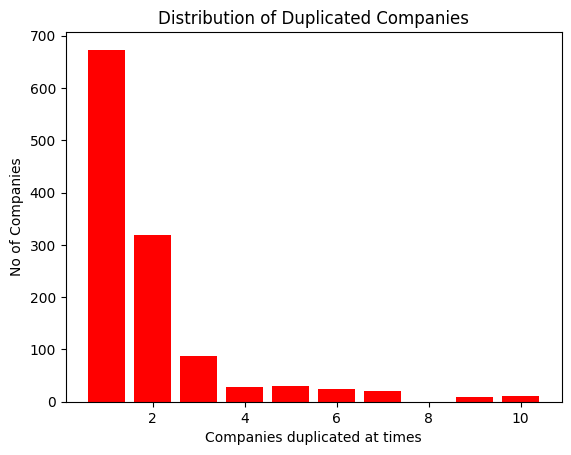

In [9]:
MostRepeated_Comp_ = Indeed_Jobs_Data_DB_1.Company.groupby(Indeed_Jobs_Data_DB_.Company).count()
MostRepeated_Comp_[MostRepeated_Comp_ >= 4].index
Data_Rept_Comp_ = pd.DataFrame(MostRepeated_Comp_.groupby(MostRepeated_Comp_).sum())
plt.bar(Data_Rept_Comp_.index, Data_Rept_Comp_.Company,color='red')
plt.xlabel('Companies duplicated at times')
plt.ylabel('No of Companies')
plt.title('Distribution of Duplicated Companies')
plt.show()

In [10]:
Indeed_Jobs_Data_DB_1_Comp = Indeed_Jobs_Data_DB_1[pd.DataFrame(Indeed_Jobs_Data_DB_1.Company.tolist()).
                      isin(list(MostRepeated_Comp_[MostRepeated_Comp_ >= 4].index)).values]

pd.DataFrame(Indeed_Jobs_Data_DB_1_Comp.groupby(['Company','Title_job'])['Location'].count()).unstack().fillna(0)

JobTitle_index = pd.DataFrame(Indeed_Jobs_Data_DB_1_Comp.groupby(['Company','Title_job'])['Location'].count()).groupby(['Title_job']).max().index
JobTitle_Values = pd.DataFrame(Indeed_Jobs_Data_DB_1_Comp.groupby(['Company','Title_job'])['Location'].count()).unstack().groupby(['Company']).fillna(0).max().values


Text(0.5, 1.0, 'Distribution of Job Title Based on Most Repeated Companies Ads')

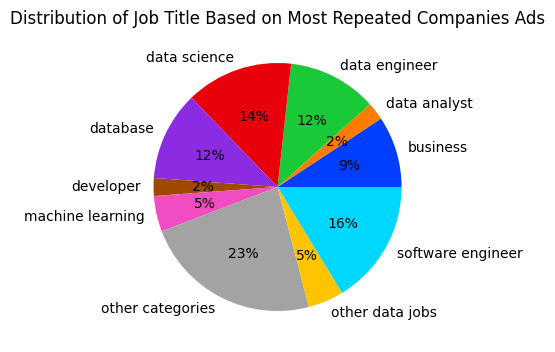

In [11]:
pc = sns.color_palette('bright')
plt.figure(figsize=(4,6))
plt.pie(JobTitle_Values,labels=JobTitle_index,
        colors=pc, autopct='%.0f%%')
plt.title('Distribution of Job Title Based on Most Repeated Companies Ads')

Location feature

In [12]:
Indeed_Jobs_Data_DB_1.groupby(['Location']).Location.count().sort_values(ascending=False)
Indeed_Jobs_Data_DB_1.Location.str.contains('Remote').sum()
Indeed_Jobs_Data_DB_1[~Indeed_Jobs_Data_DB_1.Location.str.contains(', NY') & ~Indeed_Jobs_Data_DB_1.Location.str.contains(', WA')
        & ~Indeed_Jobs_Data_DB_1.Location.str.contains(', TX') & ~Indeed_Jobs_Data_DB_1.Location.str.contains(', WI')
        & ~Indeed_Jobs_Data_DB_1.Location.str.contains(', MA') & ~Indeed_Jobs_Data_DB_1.Location.str.contains(', MN')
        & ~Indeed_Jobs_Data_DB_1.Location.str.contains(', TN') & ~Indeed_Jobs_Data_DB_1.Location.str.contains(', CA')
        & ~Indeed_Jobs_Data_DB_1.Location.str.contains(', IL') & ~Indeed_Jobs_Data_DB_1.Location.str.contains('Remote')
        & ~Indeed_Jobs_Data_DB_1.Location.str.contains(', CT') & ~Indeed_Jobs_Data_DB_1.Location.str.contains(', MD')
        & ~Indeed_Jobs_Data_DB_1.Location.str.contains(', CO') & ~Indeed_Jobs_Data_DB_1.Location.str.contains(', NJ')
        & ~Indeed_Jobs_Data_DB_1.Location.str.contains(', NC') & ~Indeed_Jobs_Data_DB_1.Location.str.contains(', GA')
        & ~Indeed_Jobs_Data_DB_1.Location.str.contains(', DC') & ~Indeed_Jobs_Data_DB_1.Location.str.contains(', OH')
        & ~Indeed_Jobs_Data_DB_1.Location.str.contains(', OR') & ~Indeed_Jobs_Data_DB_1.Location.str.contains(', VA')
        & ~Indeed_Jobs_Data_DB_1.Location.str.contains(', MI') & ~Indeed_Jobs_Data_DB_1.Location.str.contains(', OK')
        & ~Indeed_Jobs_Data_DB_1.Location.str.contains(', PA') & ~Indeed_Jobs_Data_DB_1.Location.str.contains(', FL')
        & ~Indeed_Jobs_Data_DB_1.Location.str.contains(', NE') & ~Indeed_Jobs_Data_DB_1.Location.str.contains(', MO')]['Location'].tail(30)

623              Las Vegas, NV 89101 (Downtown area)
624              Las Vegas, NV 89101 (Downtown area)
626                                   South Carolina
630                                       New Jersey
639                                            Texas
664                           Phoenix, AZ+1 location
671                             Birmingham, AL 35298
706                            Little Rock, AR 72223
724             West Des Moines, IA 50265+1 location
745                          Clemson, SC+3 locations
747                Olive Branch, MS 38654+1 location
758                  Provo, UT 84606 (East Bay area)
803                        +4 locationsHybrid remote
817                          Phoenix, AZ+2 locations
839     Scottsdale, AZ 85260 (North Scottsdale area)
846                                   Birmingham, AL
847                                   North Carolina
849                             South Bend, IN 46628
875                           Indianapolis, IN

In [13]:
Indeed_Jobs_Data_DB_1['location_clean'] = Indeed_Jobs_Data_DB_1.Location.apply(Method_For_Cleaning_Locations)
Indeed_Jobs_Data_DB2_ = Indeed_Jobs_Data_DB_1.drop('Location', axis= 1)
Indeed_Jobs_Data_DB2_.head()

,Company,Rating,Date,Salary,Description,Links,Descriptions,Title_job,location_clean
0,Driven Brands,2.4,PostedPosted 26 days ago,NaN,You’ll be working alongside a team of eight an...,https://www.indeed.com/rc/clk?jk=74d176d595225...,We invite you to join us at Driven Brands!\nHe...,data science,CA
1,Sabot Consulting,NaN,PostedPosted 4 days ago,$80 - $120 an hour,Preferred candidates will have prior experienc...,https://www.indeed.com/rc/clk?jk=f662b2efb509b...,Sabot Consulting (Sabot) is a management consu...,business,remote
2,Ballad Health,3.0,PostedPosted 30+ days ago,NaN,Job Details Apply Save Print this job Email a…,https://www.indeed.com/rc/clk?jk=58612836c63b8...,Job Details\nApply\nSave\nPrint this job\nEmai...,business,TN
3,Longevity Holdings Inc.,NaN,PostedPosted 3 days ago,"$90,000 - $110,000 a year",Incorporate core data management competencies ...,https://www.indeed.com/company/TwentyFirst/job...,Position: Data Engineer\nLocation: MN\nAs a Da...,data engineer,MN
4,WKI Kenworth,NaN,EmployerActive 2 days ago,"$50,000 - $70,000 a year",The Network Administrator provides 2nd level e...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Full Job Description\nThe Network Administrato...,developer,other loc


In [14]:
CreateDF_For_JobLocation = pd.DataFrame(Indeed_Jobs_Data_DB2_.groupby('location_clean').location_clean.count().sort_values(ascending=False))

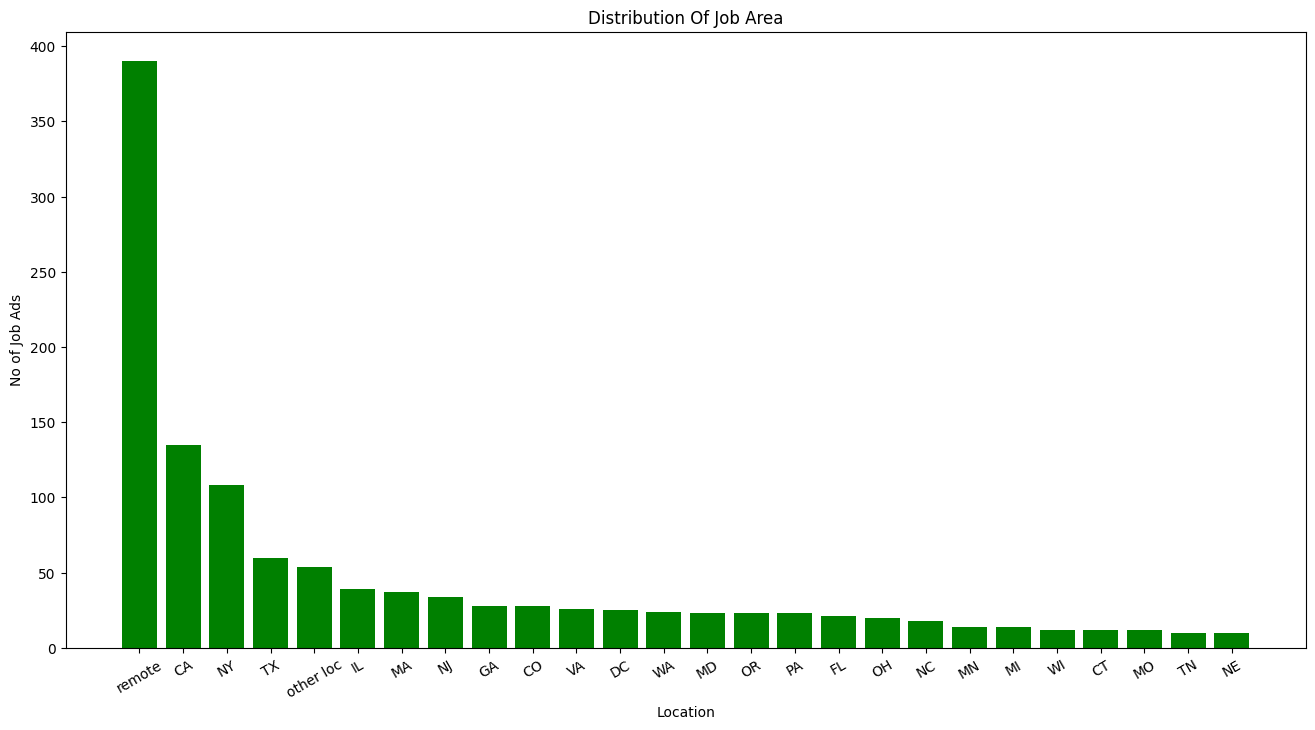

In [15]:
plt.figure(figsize=(16,8))
plt.bar(CreateDF_For_JobLocation.index, CreateDF_For_JobLocation.location_clean,color='green')
plt.xlabel('Location')
plt.xticks(rotation=30)
plt.ylabel('No of Job Ads')
plt.title('Distribution Of Job Area')
plt.show()

In [16]:
CreateDF_For_JobLocation.T
Indeed_Jobs_Data_DB2_Comp = Indeed_Jobs_Data_DB2_[pd.DataFrame(Indeed_Jobs_Data_DB2_.location_clean.tolist()).
                      isin(list(CreateDF_For_JobLocation[CreateDF_For_JobLocation >= 60].index)).values]

Text(0.5, 1.0, 'Distribution of Job Title based on location ads')

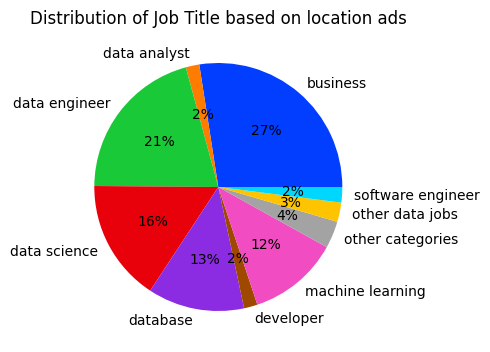

In [17]:
setDF_Figure_Locations = pd.DataFrame(Indeed_Jobs_Data_DB2_Comp.groupby(['location_clean','Title_job'])['Company'].
             count()).unstack().groupby(['location_clean']).fillna(0).max().unstack().T

JobTitle_index = setDF_Figure_Locations.index
JobTitle_Values = setDF_Figure_Locations.Company

pc = sns.color_palette('bright')
plt.figure(figsize=(4,6))
plt.pie(JobTitle_Values,labels=JobTitle_index,
        colors=pc, autopct='%.0f%%')
plt.title('Distribution of Job Title based on location ads')

In [18]:
pd.DataFrame(Indeed_Jobs_Data_DB2_Comp.groupby(['location_clean','Title_job'])['location_clean'].count()).unstack().fillna(0)


location_clean                                          \
Title_job            business data analyst data engineer data science   
location_clean                                                          
CA                        8.0          1.0          19.0         55.0   
CO                        2.0          2.0           2.0          8.0   
CT                        5.0          0.0           0.0          4.0   
DC                        8.0          2.0           1.0          4.0   
FL                        4.0          0.0           0.0          6.0   
GA                        2.0          4.0           2.0         10.0   
IL                       10.0          1.0           2.0         11.0   
MA                       11.0          1.0           2.0         14.0   
MD                        6.0          0.0           0.0          8.0   
MI                        3.0          0.0           1.0          2.0   
MN                        3.0          1.0           4.0          6.0   
MO                        3.0          0.0           2.0          6.0   
NC                        1.0          0.0           3.0          5.0   
NE                        6.0          0.0           0.0          0.0   
NJ                        6.0          0.0           3.0          8.0   
NY                       10.0          5.0          13.0         60.0   
OH                        2.0          3.0           1.0          9.0   
OR                       13.0          0.0           2.0          3.0   
PA                        3.0          0.0           3.0          7.0   
TN                        8.0          0.0           0.0          1.0   
TX                       20.0          1.0           3.0         18.0   
VA                        3.0          2.0           6.0         12.0   
WA                        2.0          0.0           4.0         11.0   
WI                        3.0          1.0           0.0          5.0   
other loc                13.0          0.0          11.0         17.0   
remote                  109.0          7.0          82.0         63.0   

                                                                     \
Title_job      database developer machine learning other categories   
location_clean                                                        
CA                  5.0       0.0             30.0              3.0   
CO                  8.0       1.0              3.0              0.0   
CT                  1.0       0.0              0.0              1.0   
DC                  8.0       0.0              1.0              0.0   
FL                  6.0       1.0              1.0              3.0   
GA                  5.0       1.0              2.0              1.0   
IL                  1.0       0.0              8.0              0.0   
MA                  0.0       0.0              5.0              2.0   
MD                  9.0       0.0              0.0              0.0   
MI                  5.0       0.0              3.0              0.0   
MN                  0.0       0.0              0.0              0.0   
MO                  1.0       0.0              0.0              0.0   
NC                  5.0       1.0              1.0              0.0   
NE                  3.0       1.0              0.0              0.0   
NJ                  1.0       4.0              3.0              4.0   
NY                  3.0       1.0             14.0              1.0   
OH                  5.0       0.0              0.0              0.0   
OR                  3.0       0.0              0.0              2.0   
PA                  4.0       1.0              1.0              3.0   
TN                  0.0       0.0              0.0              1.0   
TX                  7.0       1.0              6.0              1.0   
VA                  1.0       0.0              1.0              0.0   
WA                  3.0       0.0              3.0              1.0   
WI                  1.0       1.0              1.0 

Rating feature

In [19]:
Indeed_Jobs_Data_DB2_.head()
CheckRating_NullValues = Indeed_Jobs_Data_DB2_.groupby(['Title_job','location_clean'])['Rating'].mean().fillna(0)
CheckRating_NullValues
for i in range(0,len(CheckRating_NullValues)):
    setRule = (Indeed_Jobs_Data_DB2_.Title_job == CheckRating_NullValues.index[i][0]) & (Indeed_Jobs_Data_DB2_.location_clean == CheckRating_NullValues.index[i][1])
    Indeed_Jobs_Data_DB2_.loc[setRule, 'Rating'] = Indeed_Jobs_Data_DB2_.loc[setRule, 'Rating'].fillna(format(CheckRating_NullValues.values[i],'.2'))

In [20]:
Indeed_Jobs_Data_DB2_.isnull().sum()
Indeed_Jobs_Data_DB2_.info()
Indeed_Jobs_Data_DB2_['Rating'] = Indeed_Jobs_Data_DB2_.Rating.astype(float)
Indeed_Jobs_Data_DB2_.groupby(['Title_job'])['Rating'].mean()

JobTitle_index = Indeed_Jobs_Data_DB2_.groupby(['Title_job'])['Rating'].mean().index
JobTitle_Values = Indeed_Jobs_Data_DB2_.groupby(['Title_job'])['Rating'].mean().values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company         1200 non-null   object
 1   Rating          1200 non-null   object
 2   Date            1200 non-null   object
 3   Salary          582 non-null    object
 4   Description     1200 non-null   object
 5   Links           1200 non-null   object
 6   Descriptions    1200 non-null   object
 7   Title_job       1200 non-null   object
 8   location_clean  1200 non-null   object
dtypes: object(9)
memory usage: 84.5+ KB


Text(0.5, 1.0, 'Distribution of Ratings : Job Developers')

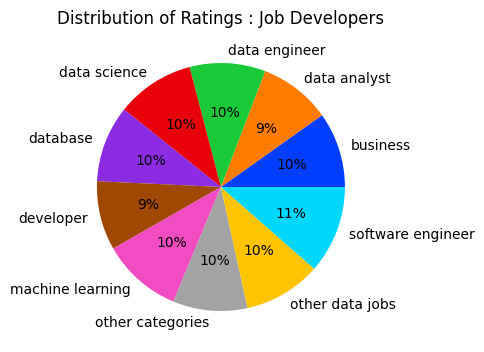

In [21]:
pc = sns.color_palette('bright')
plt.figure(figsize=(4,6))
plt.pie(JobTitle_Values,labels=JobTitle_index,
        colors=pc, autopct='%.0f%%')
plt.title('Distribution of Ratings : Job Developers')

Date feature

In [22]:
Indeed_Jobs_Data_DB2_.Date.groupby(Indeed_Jobs_Data_DB2_.Date).count()
CheckEmpDate = Indeed_Jobs_Data_DB2_[Indeed_Jobs_Data_DB2_.Date.str.contains('EmployerActive')]
CheckPostDate = Indeed_Jobs_Data_DB2_[Indeed_Jobs_Data_DB2_.Date.str.contains('PostedPosted')]
CheckRestOfDates = Indeed_Jobs_Data_DB2_[~Indeed_Jobs_Data_DB2_.Date.str.contains('PostedPosted') & ~Indeed_Jobs_Data_DB2_.Date.str.contains('EmployerActive')]
CheckRestOfDates.head()

,Company,Rating,Date,Salary,Description,Links,Descriptions,Title_job,location_clean
27,Pepsico,3.8,Hiring ongoing,"$90,000 - $100,000 a year",Manage and scale data pipelines from internal ...,https://www.indeed.com/company/PepsiCo/jobs/Ju...,"Compensation: $80k - $90k\nBenefits: Medical, ...",data engineer,remote
31,Dworo.io,3.7,Hiring ongoing,"$78,000 - $98,000 a year",Define configuration specifications and busine...,https://www.indeed.com/company/Dworo.io/jobs/B...,We are looking for a Business Analyst who will...,business,TX
36,Cognoticai,4.2,Hiring ongoing,$85 - $95 an hour,7+ years of overall software development and/o...,https://www.indeed.com/company/Cognoticai/jobs...,7+ years of overall software development and/o...,data engineer,CA
37,Kaiser Permanente,4.1,PostedToday,NaN,Completes work assignments by applying up-to-d...,https://www.indeed.com/rc/clk?jk=3a088535bc27d...,Job Summary:\n\nIn addition to the responsibil...,data science,CA
60,PCS Global Tech,3.3,Hiring ongoing,"$98,931 - $105,918 a year",Developing and managing business intelligence ...,https://www.indeed.com/company/PCS-GLOBAL-TECH...,At PCS Global Tech we care about the professio...,business,CA


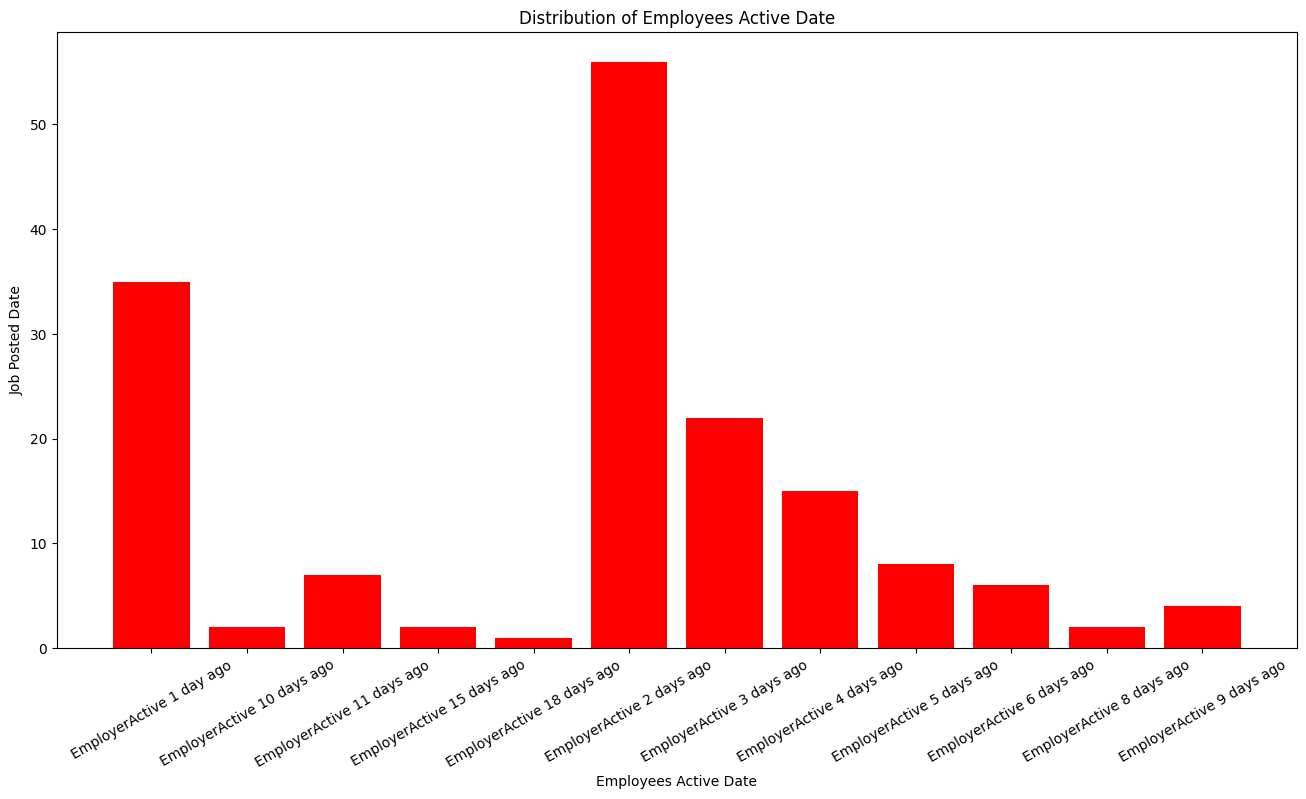

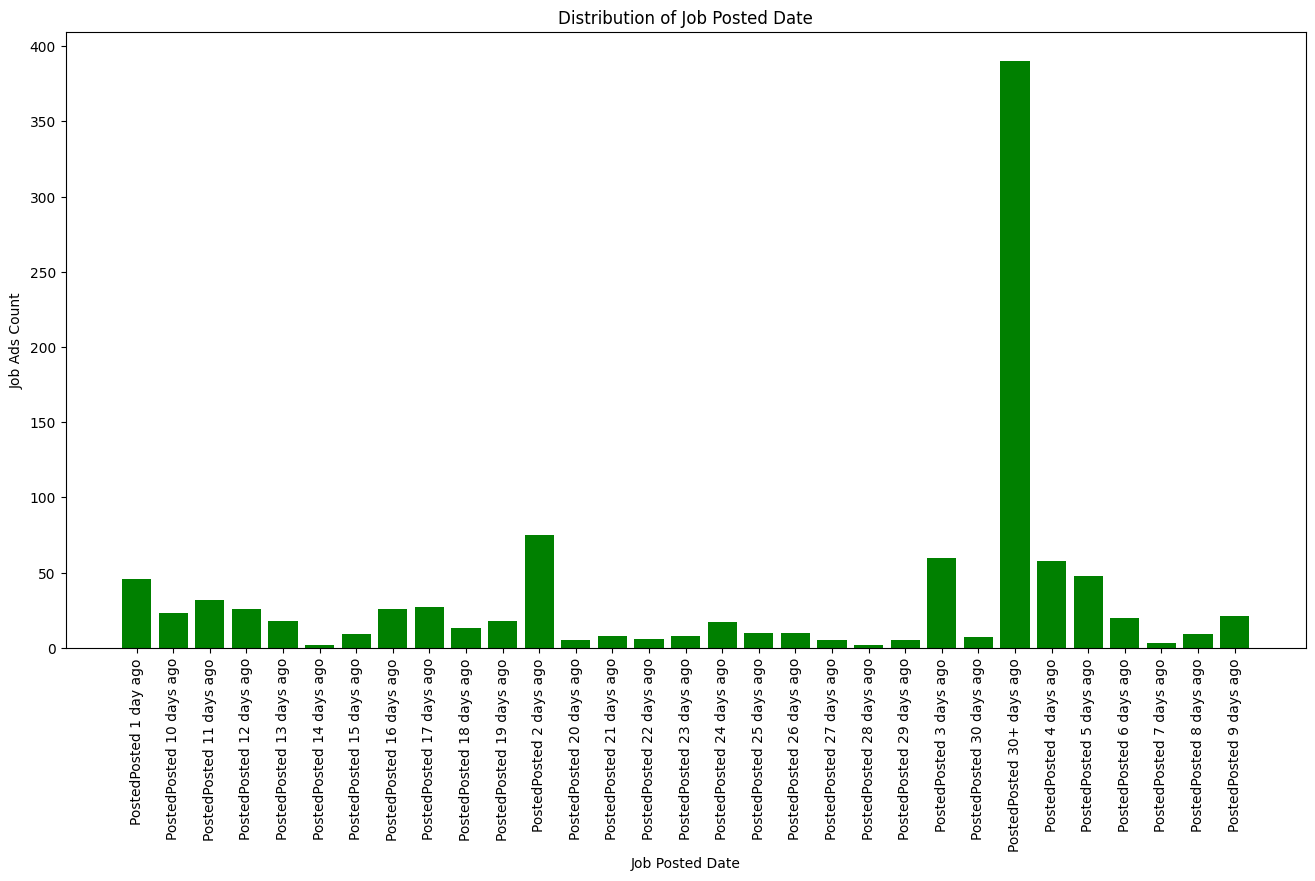

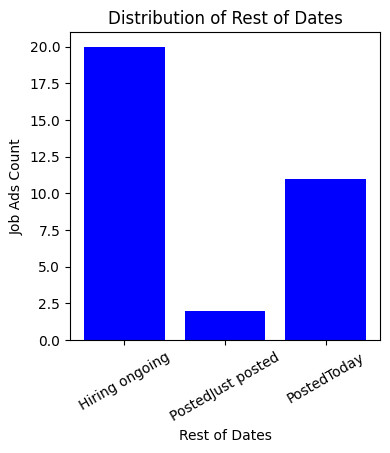

In [23]:

plt.figure(figsize=(16,8))
plt.bar(CheckEmpDate.groupby(['Date'])['Title_job'].count().index,
        CheckEmpDate.groupby(['Date'])['Title_job'].count().values,color='red')
plt.xlabel('Employees Active Date')
plt.xticks(rotation=30)
plt.ylabel('Job Posted Date')
plt.title('Distribution of Employees Active Date')
plt.show()

plt.figure(figsize=(16,8))
plt.bar(CheckPostDate.groupby(['Date'])['Title_job'].count().index,
        CheckPostDate.groupby(['Date'])['Title_job'].count().values,color='green')
plt.xlabel('Job Posted Date')
plt.xticks(rotation=90)
plt.ylabel('Job Ads Count')
plt.title('Distribution of Job Posted Date')
plt.show()
plt.figure(figsize=(4,4))
plt.bar(CheckRestOfDates.groupby(['Date'])['Title_job'].count().index,
        CheckRestOfDates.groupby(['Date'])['Title_job'].count().values,color='blue')
plt.xlabel('Rest of Dates')
plt.xticks(rotation=30)
plt.ylabel('Job Ads Count')
plt.title('Distribution of Rest of Dates')
plt.show()

Salary & Links features

In [24]:
Indeed_Jobs_Data_DB3 = Indeed_Jobs_Data_DB2_.drop(['Salary','Links'], axis = 1)
Indeed_Jobs_Data_DB3.head()

,Company,Rating,Date,Description,Descriptions,Title_job,location_clean
0,Driven Brands,2.4,PostedPosted 26 days ago,You’ll be working alongside a team of eight an...,We invite you to join us at Driven Brands!\nHe...,data science,CA
1,Sabot Consulting,3.6,PostedPosted 4 days ago,Preferred candidates will have prior experienc...,Sabot Consulting (Sabot) is a management consu...,business,remote
2,Ballad Health,3.0,PostedPosted 30+ days ago,Job Details Apply Save Print this job Email a…,Job Details\nApply\nSave\nPrint this job\nEmai...,business,TN
3,Longevity Holdings Inc.,3.8,PostedPosted 3 days ago,Incorporate core data management competencies ...,Position: Data Engineer\nLocation: MN\nAs a Da...,data engineer,MN
4,WKI Kenworth,0.0,EmployerActive 2 days ago,The Network Administrator provides 2nd level e...,Full Job Description\nThe Network Administrato...,developer,other loc


Description & Descriptions features

In [25]:
Indeed_Jobs_Data_DB3['Description'] = Indeed_Jobs_Data_DB3.Description.astype(str).str.lower()  # convert text to lowercase
Indeed_Jobs_Data_DB3['Description'] = Indeed_Jobs_Data_DB3.Description.apply(Method_HtmlParser)
Indeed_Jobs_Data_DB3['Description'] = Indeed_Jobs_Data_DB3.Description.apply(Method_CharacterNormalization)
Indeed_Jobs_Data_DB3['Description'] = Indeed_Jobs_Data_DB3.Description.apply(Method_URL_Cleaning)
Indeed_Jobs_Data_DB3['Description'] = Indeed_Jobs_Data_DB3.Description.apply(Method_Spaces_Cleaning)
Indeed_Jobs_Data_DB3['Description'] = Indeed_Jobs_Data_DB3.Description.apply(Method_Cleaning_Special_Chars)
Indeed_Jobs_Data_DB3.Description.head()

0    youll be working alongside a team of eight ana...
1    preferred candidates will have prior experienc...
2       job details apply save print this job email a 
3    incorporate core data management competencies ...
4    the network administrator provides  nd level e...
Name: Description, dtype: object

In [26]:
Indeed_Jobs_Data_DB3

,Company,Rating,Date,Description,Descriptions,Title_job,location_clean
0,Driven Brands,2.4,PostedPosted 26 days ago,youll be working alongside a team of eight ana...,We invite you to join us at Driven Brands!\nHe...,data science,CA
1,Sabot Consulting,3.6,PostedPosted 4 days ago,preferred candidates will have prior experienc...,Sabot Consulting (Sabot) is a management consu...,business,remote
2,Ballad Health,3.0,PostedPosted 30+ days ago,job details apply save print this job email a,Job Details\nApply\nSave\nPrint this job\nEmai...,business,TN
3,Longevity Holdings Inc.,3.8,PostedPosted 3 days ago,incorporate core data management competencies ...,Position: Data Engineer\nLocation: MN\nAs a Da...,data engineer,MN
4,WKI Kenworth,0.0,EmployerActive 2 days ago,the network administrator provides nd level e...,Full Job Description\nThe Network Administrato...,developer,other loc
...,...,...,...,...,...,...,...
1195,HyperScience,3.9,PostedPosted 24 days ago,we turn ml lab experiments into enterpriseread...,Company Description\nHyperscience is transform...,machine learning,remote
1196,N9 it solutions,3.6,PostedPosted 4 days ago,experience using a variety of data mining data...,Job Title: - Data Scientist\nPosition: - W2 Em...,data science,remote
1197,Marathon TS,3.7,PostedPosted 2 days ago,years working with databases data modeling ...,Data Engineer/Power BI\nLocation: Remote (Base...,data engineer,remote
1198,Red Ventures,3.2,PostedPosted 30+ days ago,you will be responsible for overseeing the tea...,"In this role, you will have the opportunity to...",data science,NY


 most repeated words

(-0.5, 1599.5, 799.5, -0.5)

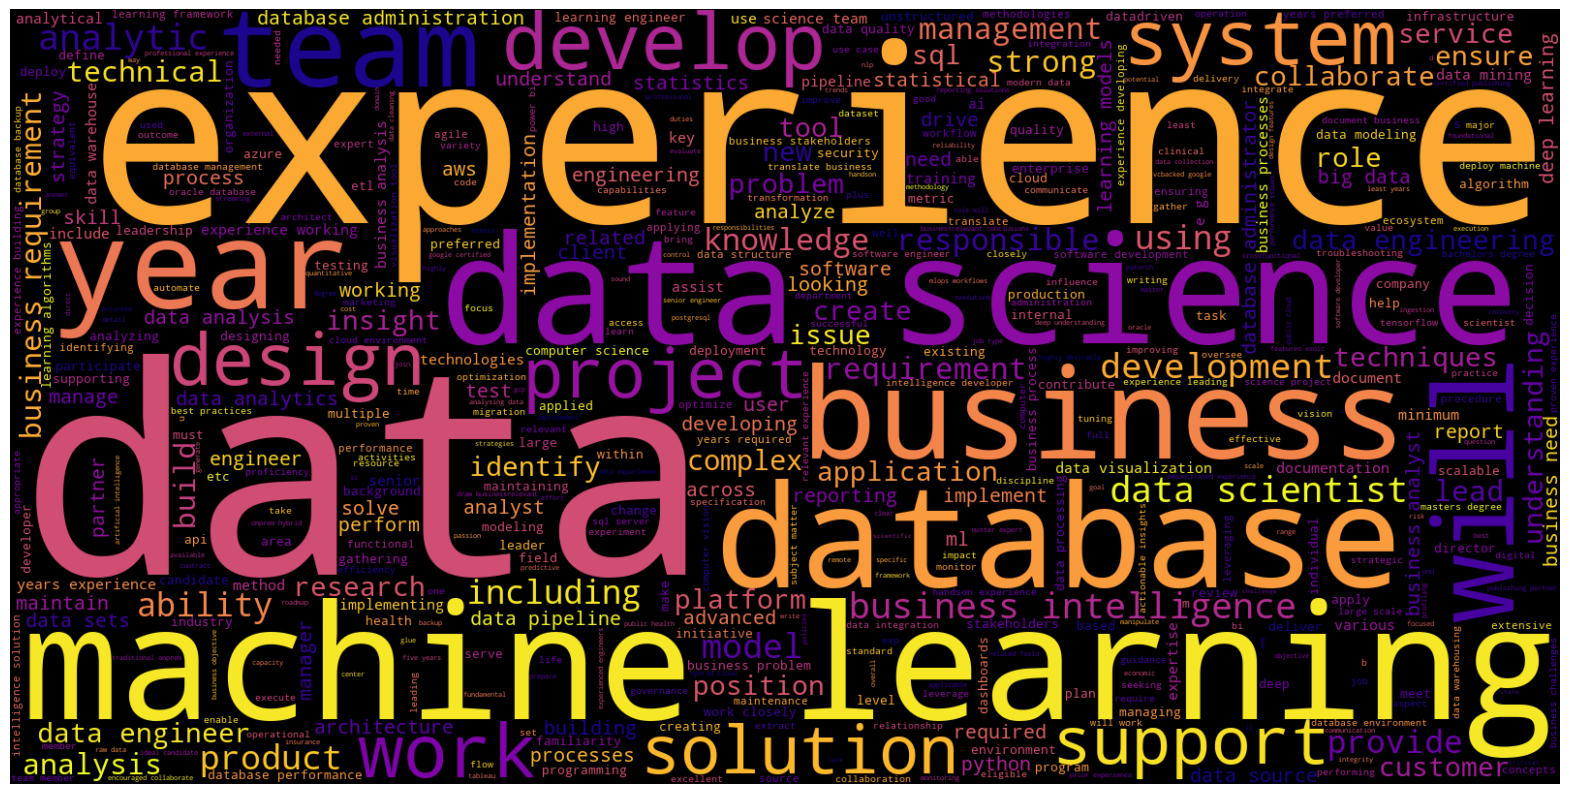

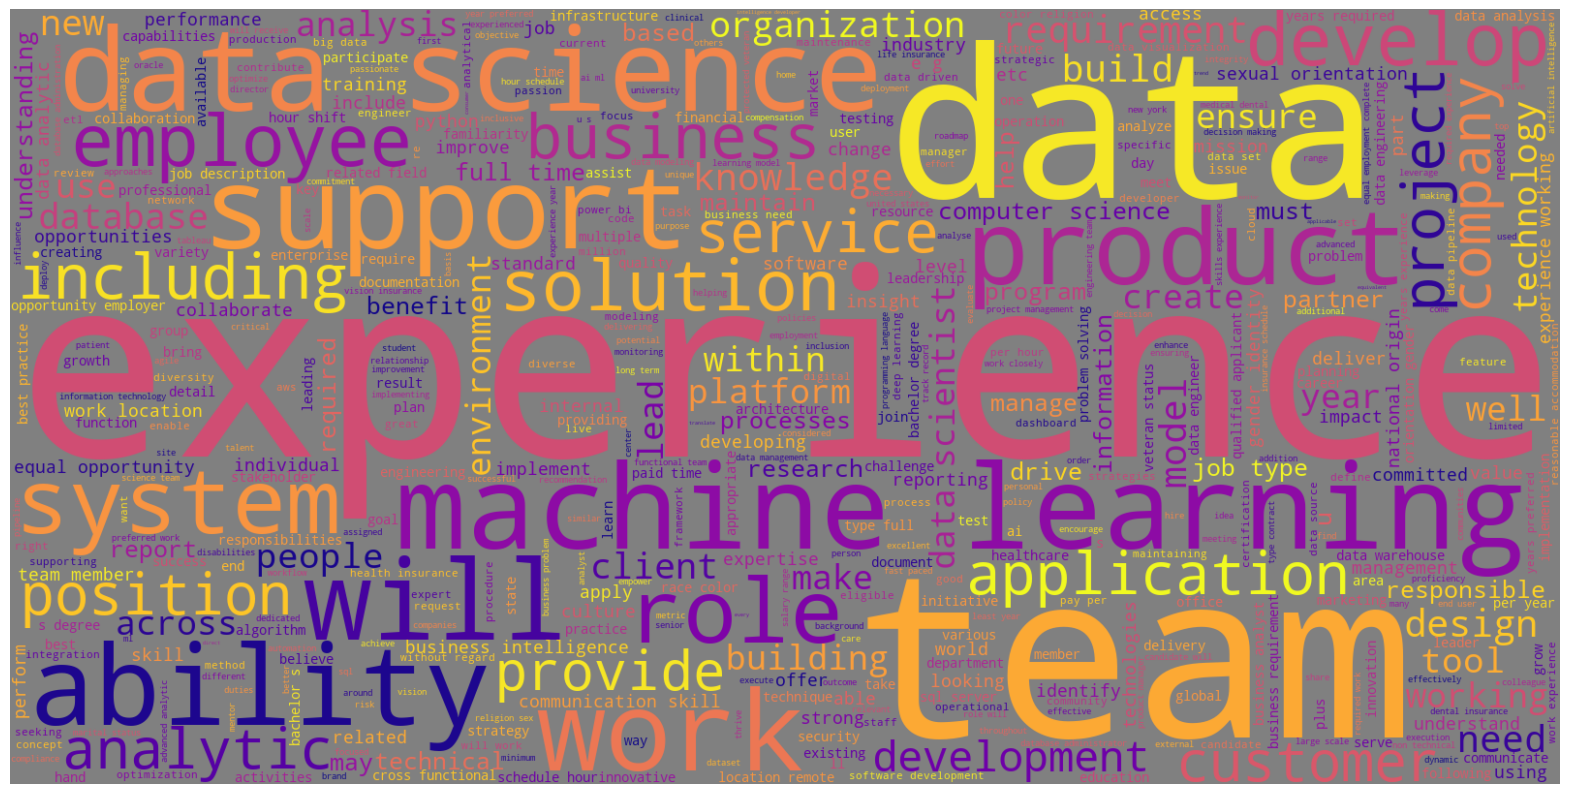

In [27]:
CheckDuplicatedWords_=" ".join(Indeed_Jobs_Data_DB3.Description.str.lower())
plt.figure(figsize=(20,14))
setColor_ = WordCloud(background_color="black", stopwords = STOPWORDS, max_words=500, max_font_size= 300,  width=1600, height=800)
setColor_.generate(CheckDuplicatedWords_)
plt.imshow(setColor_.recolor( colormap= 'plasma' , random_state=17), interpolation="bilinear")
plt.axis('off')

CheckDuplicatedWords_=" ".join(Indeed_Jobs_Data_DB3.Descriptions.str.lower())
plt.figure(figsize=(20,14))
setColor_ = WordCloud(background_color="grey", stopwords = STOPWORDS, max_words=500, max_font_size= 300,  width=1600, height=800)
setColor_.generate(CheckDuplicatedWords_)
plt.imshow(setColor_.recolor( colormap= 'plasma' , random_state=17), interpolation="bilinear")
plt.axis('off')

Applying Different Models

Data Preparation

In [28]:
Indeed_Jobs_Data_DB3['Company_numeric'] = Indeed_Jobs_Data_DB3.Company.replace(dict(Indeed_Jobs_Data_DB3.Company.value_counts()))
Indeed_Jobs_Data_DB3['Date_numeric'] = Indeed_Jobs_Data_DB3.Date.replace(dict(Indeed_Jobs_Data_DB3.Date.value_counts()))
Indeed_Jobs_Data_DB3['Title_job_numeric'] = Indeed_Jobs_Data_DB3.Title_job.replace(dict(Indeed_Jobs_Data_DB3.Title_job.value_counts()))
Indeed_Jobs_Data_DB3['location_clean_numeric'] = Indeed_Jobs_Data_DB3.location_clean.replace(dict(Indeed_Jobs_Data_DB3.location_clean.value_counts()))
Indeed_Jobs_Data_DB4 = Indeed_Jobs_Data_DB3.drop(['Company','Date','Title_job','location_clean'], axis= 1)
Indeed_Jobs_Data_DB4.head()


,Rating,Description,Descriptions,Company_numeric,Date_numeric,Title_job_numeric,location_clean_numeric
0,2.4,youll be working alongside a team of eight ana...,We invite you to join us at Driven Brands!\nHe...,1,10,353,135
1,3.6,preferred candidates will have prior experienc...,Sabot Consulting (Sabot) is a management consu...,2,58,264,390
2,3.0,job details apply save print this job email a,Job Details\nApply\nSave\nPrint this job\nEmai...,2,390,264,10
3,3.8,incorporate core data management competencies ...,Position: Data Engineer\nLocation: MN\nAs a Da...,1,60,166,14
4,0.0,the network administrator provides nd level e...,Full Job Description\nThe Network Administrato...,1,56,21,54


In [29]:
Indeed_Jobs_Data_DB4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rating                  1200 non-null   float64
 1   Description             1200 non-null   object 
 2   Descriptions            1200 non-null   object 
 3   Company_numeric         1200 non-null   int64  
 4   Date_numeric            1200 non-null   int64  
 5   Title_job_numeric       1200 non-null   int64  
 6   location_clean_numeric  1200 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 65.8+ KB


In [38]:
Indeed_Jobs_Data_DB4['Description_l'] = Indeed_Jobs_Data_DB4.Description.apply(len)
Indeed_Jobs_Data_DB4['Descriptions_l'] = Indeed_Jobs_Data_DB4.Descriptions.apply(len)

CheckDescription_Size = int(np.quantile(Indeed_Jobs_Data_DB4.Description_l.fillna(0),.95))
CheckDescription_Sizes = int(np.quantile(Indeed_Jobs_Data_DB4.Descriptions_l.fillna(0),.95))
setXRE = Indeed_Jobs_Data_DB4.drop(['Description','Descriptions','Rating'],axis=1)
setDF_Disp = Indeed_Jobs_Data_DB4['Description']
setDF_Disps = Indeed_Jobs_Data_DB4['Descriptions']
sety = Indeed_Jobs_Data_DB4.Rating
setXRE

,Company_numeric,Date_numeric,Title_job_numeric,location_clean_numeric,Description_l,Descriptions_l
0,1,10,353,135,150,2481
1,2,58,264,390,151,2677
2,2,390,264,10,46,52
3,1,60,166,14,161,3466
4,1,56,21,54,148,3618
...,...,...,...,...,...,...
1195,1,17,133,390,141,3488
1196,1,58,353,390,160,5034
1197,1,75,166,390,159,2114
1198,1,390,353,108,159,6161


Dataset spliting

In [39]:
TrainX, TestX, TrainY, TestY = train_test_split(setXRE, sety,test_size = 0.2,
                                                    random_state = 0, stratify = sety)




Feature Scaling

In [40]:
FeatureScaling = StandardScaler()
TrainX = FeatureScaling.fit_transform(TrainX)
TestX = FeatureScaling.transform(TestX)
print("TrainX shape: {}".format(TrainX.shape))
print("TrainY shape: {}".format(TrainY.shape))
print("Val_X shape: {}".format(TestX.shape))
print("Val_Y shape: {}".format(TestY.shape))

TrainX shape: (960, 6)
TrainY shape: (960,)
Val_X shape: (240, 6)
Val_Y shape: (240,)


Modeling and Evaluation

In [41]:
setModelResults = {}
def Method_For_Models_Eval(TrainX, Val_X, TrainY, Val_Y,
                                         ModelName=['RandomForest','GradientBoosting',
                                               'LinearRegression','SVM']):

  if ModelName == 'RandomForest':
    setmodel = RandomForestRegressor()
  elif ModelName == 'GradientBoosting':
    setmodel = GradientBoostingRegressor()
  elif ModelName == 'LinearRegression':
    setmodel = LinearRegression()
  elif ModelName == 'SVM':
    setmodel = SVR()
  startingTime = process_time()
  setmodel.fit(TrainX,TrainY)
  EndingTime = process_time()
  TrainY_Predictions_ = setmodel.predict(TrainX)
  y_val_pred = setmodel.predict(Val_X)
  TrainRScore = r2_score(TrainY, TrainY_Predictions_)
  ValRScore = r2_score(Val_Y, y_val_pred)
  TrainRMSE_ = math.sqrt(mean_squared_error(TrainY, TrainY_Predictions_))
  Values_RMSE = math.sqrt(mean_squared_error(Val_Y, y_val_pred))
  TrainMAE = mean_absolute_error(TrainY, TrainY_Predictions_)
  ValuesMAE = mean_absolute_error(Val_Y, y_val_pred)
  setModelResults[ModelName] = [EndingTime-startingTime,TrainRScore,
                          ValRScore,TrainRMSE_,Values_RMSE,TrainMAE,ValuesMAE]
  return setModelResults, y_val_pred, TrainMAE, ValuesMAE

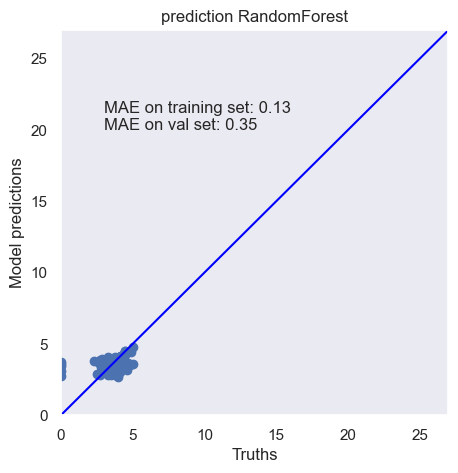

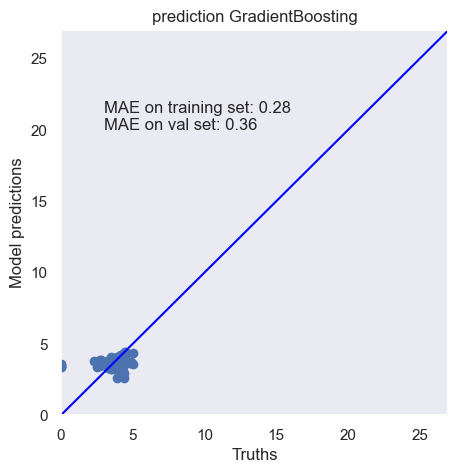

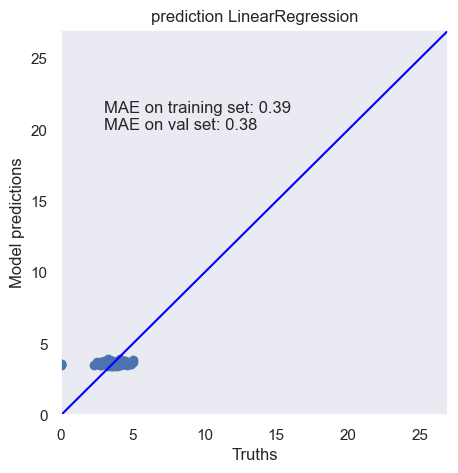

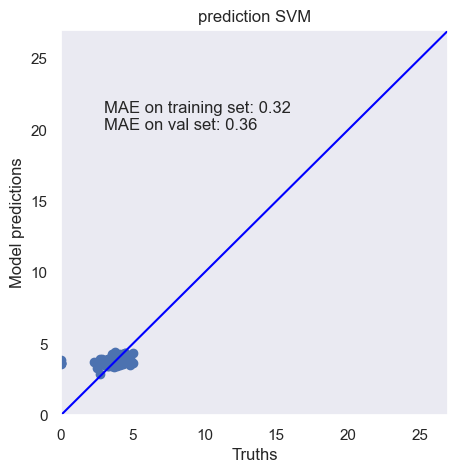

In [42]:
setModelResults = {}
setDiffModels = ['RandomForest','GradientBoosting','LinearRegression','SVM']
for item in setDiffModels:
  setModelResults, y_val_pred, TrainMAE, ValuesMAE = Method_For_Models_Eval(TrainX, TestX, TrainY, TestY,item)
  JobTitle_score = f"MAE on training set: {TrainMAE:.2f} "
  JobTitle_score += f"\nMAE on val set: {ValuesMAE:.2f} "

  fig, ax = plt.subplots(figsize=(5, 5))
  plt.scatter(TestY, y_val_pred)
  ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c="blue")
  plt.text(3, 20, JobTitle_score)
  plt.title("prediction {0}".format(item))
  plt.ylabel("Model predictions")
  plt.xlabel("Truths")
  plt.xlim([0, 27])
  _ = plt.ylim([0, 27])

Model Results

In [43]:
FinalResults = pd.DataFrame(setModelResults).T
FinalResults.index.name = 'Default Model'
FinalResults.columns = ['Training_time', 'train_r2_score', 'val_r2_score', 'train_RMSE', 'val_RMSE', 'train_MAE', 'val_MAE']
FinalResults.sort_index()

,Training_time,train_r2_score,val_r2_score,train_RMSE,val_RMSE,train_MAE,val_MAE
Default Model,,,,,,,
GradientBoosting,0.071116,0.543504,0.054878,0.460573,0.656006,0.280076,0.358419
LinearRegression,0.001209,0.017381,0.039071,0.675730,0.661469,0.393230,0.379923
RandomForest,0.257448,0.882628,0.116807,0.233541,0.634150,0.127473,0.345283
SVM,0.027151,0.100703,0.042852,0.646446,0.660167,0.319026,0.357780
